In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving New Carbonate environment-3-classes.xlsx to New Carbonate environment-3-classes.xlsx


In [3]:
file_name_1 = "New Carbonate environment-3-classes.xlsx"
df = pd.read_excel(file_name_1)

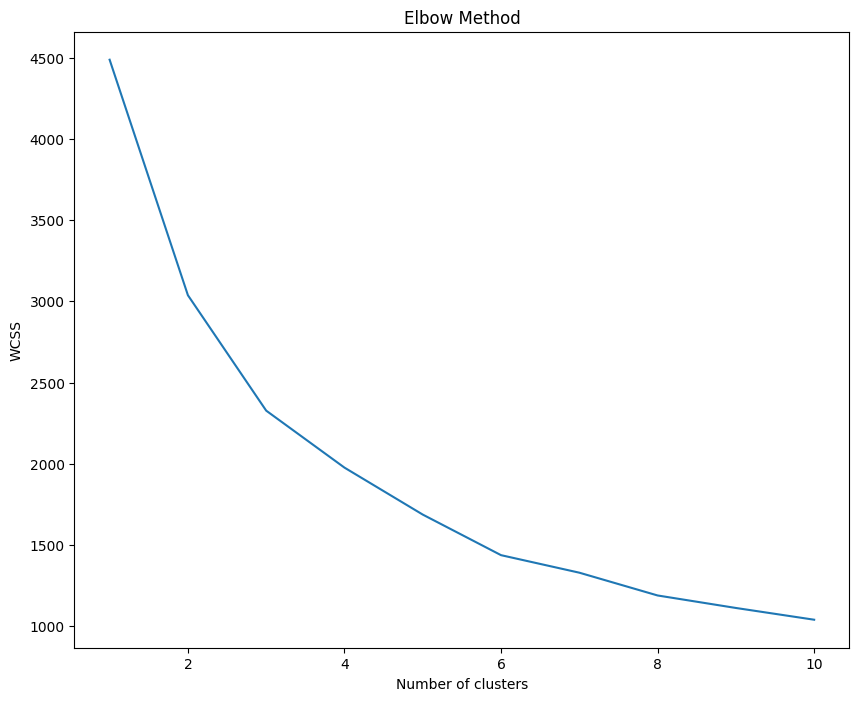

Silhouette Score: 0.61


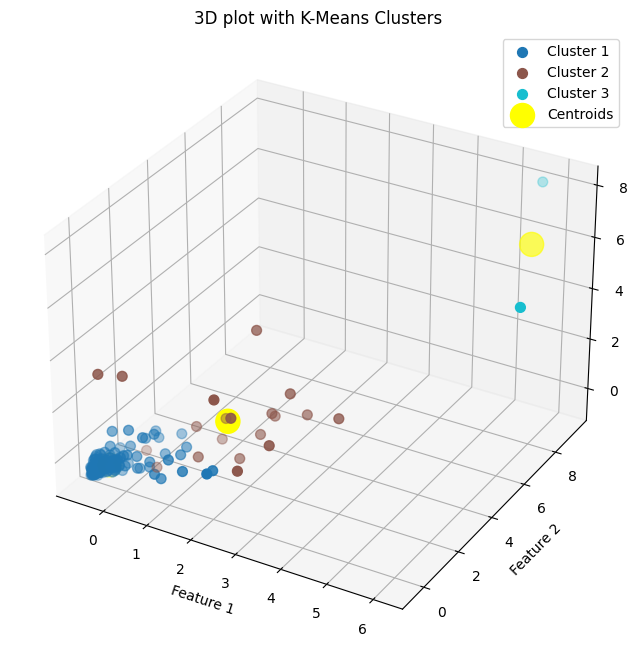

Cluster        0   1  2
Environment            
ADRE         130   0  0
HF            37  15  0
KF            15   5  2


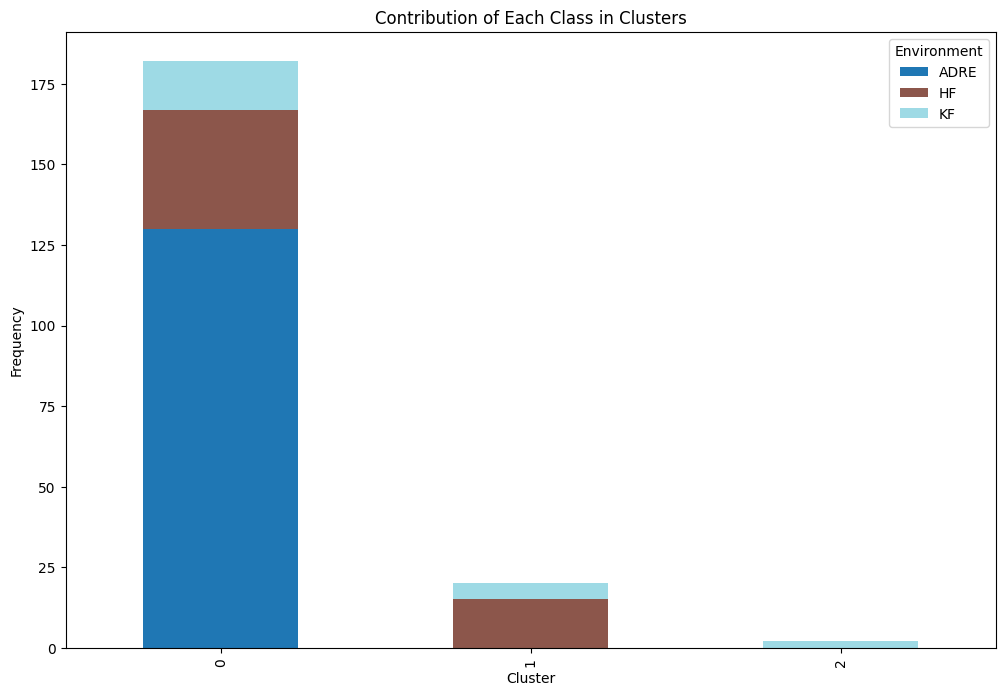

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame with features and 'Environment' as the true labels
# If 'df' is not defined, replace it with your DataFrame

# Drop 'Environment' to use as features
X = df.drop('Environment', axis=1).values  # Feature values
y_true = df['Environment'].values  # True labels

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Elbow method to determine the optimal number of clusters k
wcss = []
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Choose the number of clusters based on the elbow method
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_std)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_std, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    ax.scatter(X_std[y_kmeans == i, 0], X_std[y_kmeans == i, 1], X_std[y_kmeans == i, 2],
               s=50, c=[colors[i]], label=f'Cluster {i+1}')

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids')

ax.set_title('3D plot with K-Means Clusters')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()

# Compare with the original categories by creating a cross-tabulation
df['Cluster'] = y_kmeans
cross_tab = pd.crosstab(df['Environment'], df['Cluster'])
print(cross_tab)

# Plot stacked histogram for class contributions within each cluster
cluster_counts = df.groupby(['Cluster', 'Environment']).size().unstack().fillna(0)
cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Contribution of Each Class in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.legend(title='Environment')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-6-9fd7ba6e7bc1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X_std)


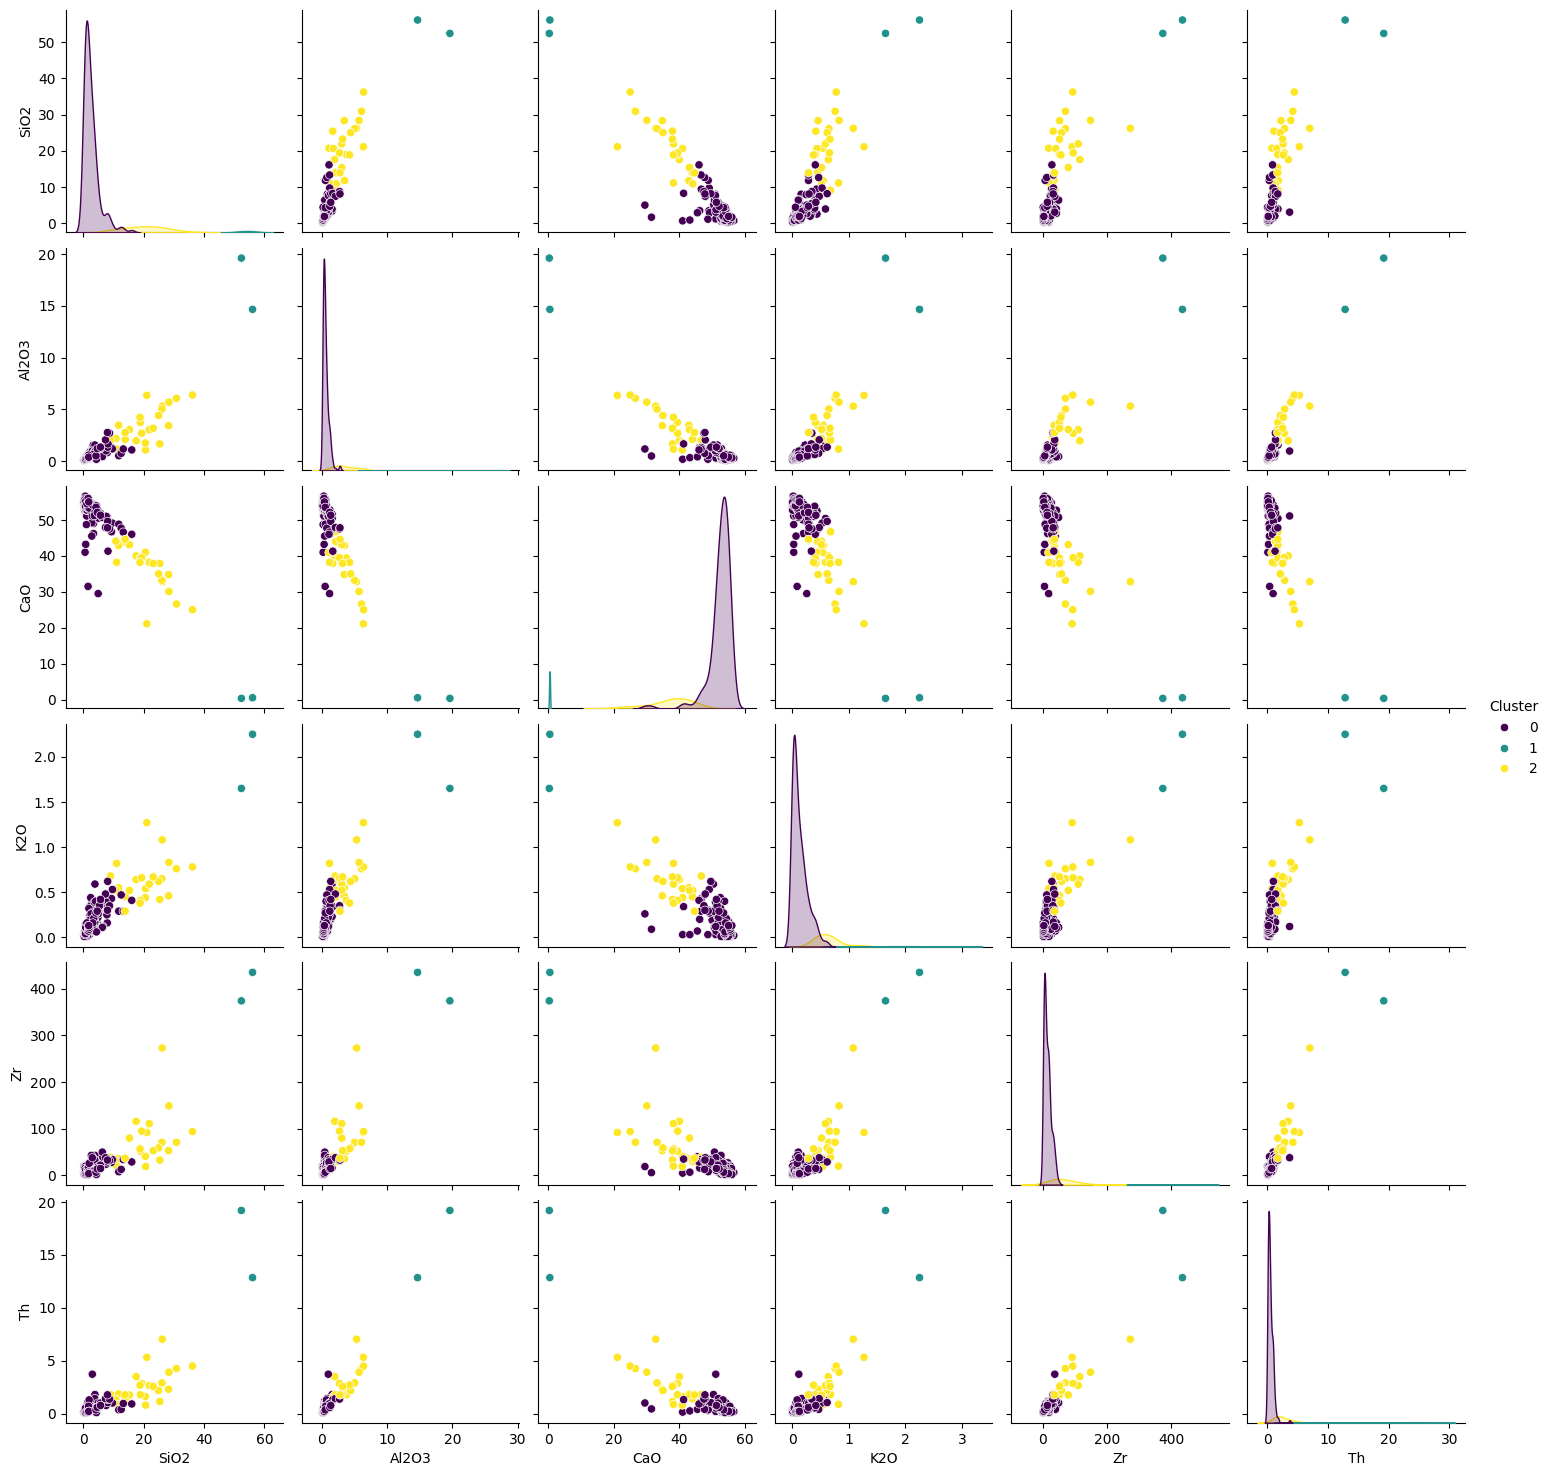

In [6]:
selected_features = ['SiO2', 'Al2O3', 'CaO', 'K2O', 'Zr', 'Th']
X = df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters if necessary
X['Cluster'] = kmeans.fit_predict(X_std)

# Now create a pairplot with seaborn
sns.pairplot(X, hue='Cluster', vars=selected_features, palette='viridis')

# To save the plot to a file
plt.savefig('pairplot.png')

# Show the plot
plt.show()